In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#import eli5
#from eli5.sklearn import PermutationImportance

In [3]:
# 필요한 데이터를 load 하겠습니다.
df_path = 'concat_select.csv'
df = pd.read_csv(df_path)

In [4]:
# 각 컬럼별 결측치 개수 계산
missing_values_count = df.isnull().sum()

# 각 컬럼별 결측치 비율 계산
missing_values_ratio = df.isnull().mean() * 100

# 결과를 하나의 데이터프레임으로 결합
missing_values_df = pd.DataFrame({'Missing Count': missing_values_count, 
                                  'Missing Ratio (%)': missing_values_ratio})

# 결과 출력
missing_values_df

,Missing Count,Missing Ratio (%)
번지,227,0.021851
본번,75,0.007220
부번,75,0.007220
아파트명,1923,0.185109
전용면적,0,0.000000
계약일,0,0.000000
층,0,0.000000
건축년도,0,0.000000
도로명,0,0.000000
"k-단지분류(아파트,주상복합등등)",805798,77.566646


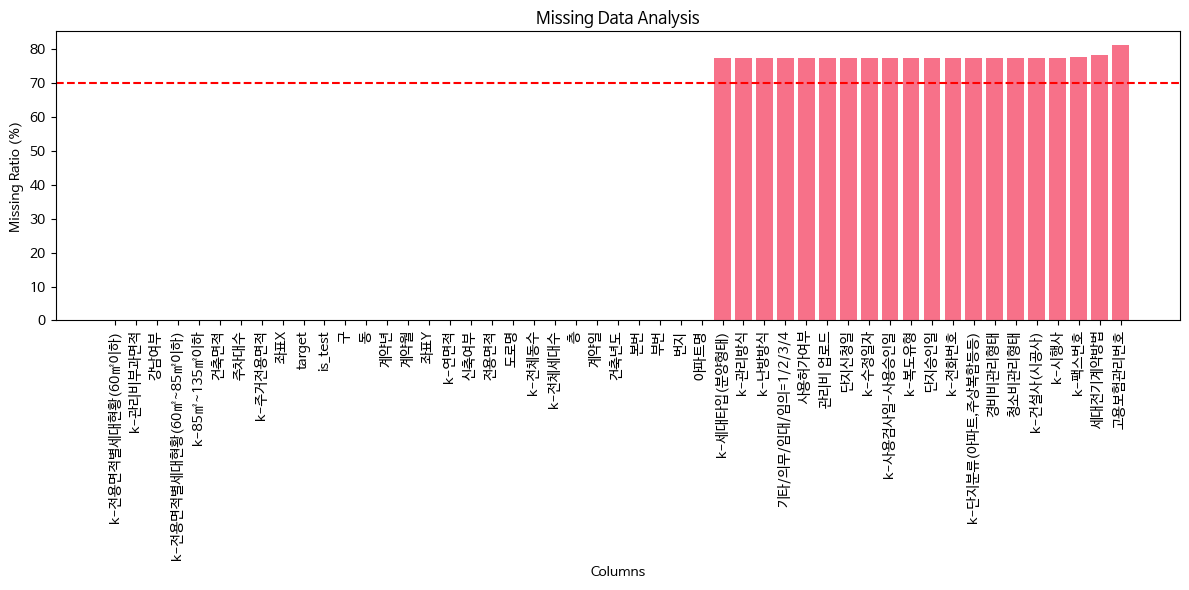

In [5]:
# 각 컬럼별 결측치 비율 계산
missing_ratio = df.isnull().mean() * 100

# 결측치가 적은 순으로 정렬
sorted_columns = missing_ratio.sort_values()

# seaborn의 컬러 팔레트 사용
sns.set_palette("husl")

plt.figure(figsize=(12, 6))

# 정렬된 데이터로 막대 그래프 그리기
plt.bar(sorted_columns.index, sorted_columns)
plt.xlabel('Columns')
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Data Analysis')
plt.xticks(rotation=90)

plt.axhline(y=70, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [6]:
# 각 컬럼별 결측치 비율 계산
missing_ratio = df.isnull().mean()

# 70% 이상인 컬럼 찾기
columns_to_drop = missing_ratio[missing_ratio > 0.7].index
print("Columns to drop:", columns_to_drop)

# 해당 컬럼 제거
df_dropped = df.drop(columns=columns_to_drop)

#컬럼 20개 제거됨

Columns to drop: Index(['k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식',
       'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-수정일자',
       '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4',
       '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일'],
      dtype='object')


In [7]:
df_dropped.shape

(1038846, 29)

In [8]:
# 각 컬럼별 결측치 개수 계산
missing_values_count = df_dropped.isnull().sum()

# 각 컬럼별 결측치 비율 계산
missing_values_ratio = df_dropped.isnull().mean() * 100

# 결과를 하나의 데이터프레임으로 결합
missing_values_df = pd.DataFrame({'Missing Count': missing_values_count, 
                                  'Missing Ratio (%)': missing_values_ratio})

# 결과 출력
missing_values_df

,Missing Count,Missing Ratio (%)
번지,227,0.021851
본번,75,0.007220
부번,75,0.007220
아파트명,1923,0.185109
전용면적,0,0.000000
계약일,0,0.000000
층,0,0.000000
건축년도,0,0.000000
도로명,0,0.000000
k-전체동수,0,0.000000


In [9]:
# 결측치가 있는 행을 제거
df_cleaned = df_dropped.dropna()

df_cleaned.shape

(1036696, 29)

In [10]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [11]:
sampled_df = df_cleaned.sample(n=min(2000, len(df_cleaned)), random_state=1)

# 추출된 데이터를 CSV 파일로 저장합니다.
sampled_df.to_csv('sampled_data.csv', index=False)

In [12]:
# 각 컬럼별 결측치 개수 계산
missing_values_count = df_cleaned.isnull().sum()

# 각 컬럼별 결측치 비율 계산
missing_values_ratio = df_cleaned.isnull().mean() * 100

# 결과를 하나의 데이터프레임으로 결합
missing_values_df = pd.DataFrame({'Missing Count': missing_values_count, 
                                  'Missing Ratio (%)': missing_values_ratio})

# 결과 출력
missing_values_df

,Missing Count,Missing Ratio (%)
번지,0,0.0
본번,0,0.0
부번,0,0.0
아파트명,0,0.0
전용면적,0,0.0
계약일,0,0.0
층,0,0.0
건축년도,0,0.0
도로명,0,0.0
k-전체동수,0,0.0
